# Data Exploration Assignment - Section 2

---

The data (churn.csv) is from a bank in a village town in India, and contains the clients churn data over a particular banking product category. The data collected revolves around the risk type, the age, the family dependent indicator, the income levels and health condition with reference to whether the client churns (unsubscribe) from the product.

### Q1a

There are two types of target variables, either categorical or continuous variable. Indicate suitable models that you could employ for predictive purpose for the two categories, provide one for each category. Fill in the blanks below.

<ins>Category - Continuous</ins><br>
>Models: **Regression (Linear Regression)**



<ins>Category - Categorical</ins><br>
>Models: **Classification (Logistic Regression)**

### Q1b

Import the following Python libraries:
- Numpy
- Pandas
- Random
- Train_test_split
- Matplotlib
- Sklearn – Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import random 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns # Seaborn is not required to be imported, but I've done so for my own visualisation purposes
from sklearn.linear_model import LogisticRegression

### Q1c

Read the “churn.csv” dataset and store it into a dataframe named **df**.

In [2]:
df = pd.read_csv("/Users/leontanyongle/DE/DataExplorationAssignment-201128-204900/churn.csv")

In [3]:
# Not part of the question's requirements
# Having a quick look at the data
df.head()

,risk_type,age,dependents,income,health,churn
0,5.0,67,3,5,3,0
1,4.0,43,1,1,3,0
2,5.0,58,5,5,3,0
3,4.0,28,1,1,3,1
4,5.0,74,1,5,3,0


In [4]:
# Not part of the question's requirements
# Indication of two null values in the risk_type column 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   risk_type   960 non-null    float64
 1   age         962 non-null    int64  
 2   dependents  962 non-null    int64  
 3   income      962 non-null    int64  
 4   health      962 non-null    int64  
 5   churn       962 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 45.2 KB


In [5]:
# Not part of the question's requirements
# Seems that there're outliers/incorrect values in all columns besides age and churn
df.describe().T

,count,mean,std,min,25%,50%,75%,max
risk_type,960.0,4.293750,0.709802,0.0,4.0,4.0,5.0,6.0
age,962.0,55.453222,14.527895,5.0,45.0,57.0,66.0,96.0
dependents,962.0,2.761954,1.527578,1.0,2.0,3.0,4.0,31.0
income,962.0,2.854470,2.111271,1.0,1.0,3.0,4.0,48.0
health,962.0,3.000000,2.386225,1.0,3.0,3.0,3.0,76.0
churn,962.0,0.444906,0.497214,0.0,0.0,0.0,1.0,1.0


<AxesSubplot:xlabel='age', ylabel='Count'>

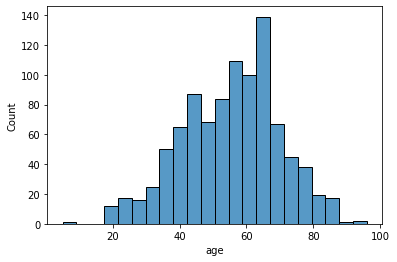

In [6]:
# Not part of the question's requirements
# Since most of the columns have already been converted into ordinal and nominal data, 
# we take a look at the figures in the age column 
sns.histplot(x="age", data=df)

<AxesSubplot:xlabel='churn', ylabel='count'>

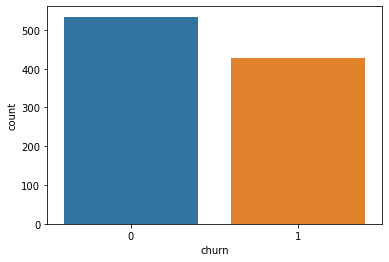

In [7]:
# Not part of the question's requirements
# Viewing the numbers on people who churned or not
sns.countplot(x="churn",data=df)

In [8]:
# Not part of the question's requirements
df["income"].value_counts()

1     357
4     279
3     164
5     137
2      24
48      1
Name: income, dtype: int64

In [9]:
# Not part of the question's requirements
df["dependents"].value_counts()

4     398
1     224
2     211
3     126
5       2
31      1
Name: dependents, dtype: int64

In [10]:
# Not part of the question's requirements
df["health"].value_counts()

3     875
2      59
1      15
4       8
5       4
76      1
Name: health, dtype: int64

In [11]:
# Not part of the question's requirements
df["risk_type"].value_counts()

4.0    547
5.0    346
3.0     36
2.0     15
6.0     11
0.0      5
Name: risk_type, dtype: int64

In [12]:
# Not part of the question's requirements
# It seems that the incorrect values from dependents, income, and health are all in the same row
# For this assignment, we won't remove or edit this data as it's not a requirement,
# and because the 500 samples which we'll extract later doesn't include this row 
df[df["income"] == 48]

,risk_type,age,dependents,income,health,churn
961,2.0,5,31,48,76,1


In [13]:
# The metadata in the accompanying word document mentions that the risk_type should be from values 1 - 5
# However, there're incorrect values for risk_type, and they're in different rows, 
# and will be selected as part of the 500 samples later on
# I'll not make any changes to this as there're no further instructions or requirements 
# on what to do with this data in this assignment
df[(df["risk_type"] == 6.0) | (df["risk_type"] == 0.0)]

,risk_type,age,dependents,income,health,churn
456,0.0,87,4,5,3,0
533,0.0,73,4,5,3,1
550,6.0,38,2,1,3,0
664,6.0,54,4,3,3,0
692,6.0,22,2,1,3,0
707,6.0,32,2,1,3,1
717,6.0,68,1,1,3,0
718,6.0,29,1,1,3,0
745,6.0,58,2,1,3,1
784,6.0,44,2,1,2,1


### Q2a

The presence of NULL values in the data set will affect the accuracy of the data and will require data cleaning process to take place before applying any predictive modelling approach.

Provide the Python code that returns the Boolean value (i.e. True/False) on whether each variable in df contains NULL values.

In [14]:
# Confirming that null values only exist in the risk_type column
df.isnull().any()

# Alternate answer to produce the same output: 
# df.isnull().sum() > 0

risk_type      True
age           False
dependents    False
income        False
health        False
churn         False
dtype: bool

In [3]:
# Answer provided by the instructor here: 

risk_type      True
age           False
dependents    False
income        False
health        False
churn         False
dtype: bool

### Q2b

Write a for-loop to print out the number of NULL values in each variable in df.

In [15]:
for i in df:
    print(df[i].isnull().sum())

2
0
0
0
0
0


In [4]:
# Answer provided by the instructor here: 

2
0
0
0
0
0


### Q2c

Drop the rows ONLY where the variable “risk_type” contains NULL values.

In [16]:
# Finding the rows in the risk_type columns that have null values 
df[df["risk_type"].isnull()]

,risk_type,age,dependents,income,health,churn
20,NaN,56,4,3,1,1
208,NaN,46,1,1,1,1


In [17]:
# Dropping the rows using index positioning and resetting the index
df = df.drop(df.index[[20,208]]).reset_index(drop=True)

In [18]:
# Not part of the question's requirements
# Confirming that there're no longer any null values in the column
df[df["risk_type"].isnull()]

,risk_type,age,dependents,income,health,churn


In [19]:
# Not part of the question's requirements
# Confirming that there're no longer any null values in any column
df.isnull().sum()

risk_type     0
age           0
dependents    0
income        0
health        0
churn         0
dtype: int64

In [20]:
# Not part of the question's requirements
# Confirming that the two problematic rows have indeed been dropped
len(df)

960

### Q2d

The cleanliness and integrity of the data set is vital for the model building process, and implementing certain techniques such as dropping rows with NULL values is one method to ensure data accuracy and model validation.

Suggest one method or guideline to handle NULL value besides dropping the rows which will safeguard data accuracy, and integrity


**We can fill the null values with mean or median values instead.**

### Q2e

For the variable “age”, bin each row of data based on the following criteria:
- 1: age < 20 years 
- 2: 20 <= age < 40
- 3: 40 <= age < 60
- 4: 60 <= age < 80
- 5: age >= 80

Ensure that the binned values are stored as integers.

In [21]:
# Getting a brief understanding of the values in the age column
df["age"].value_counts()

57    37
59    36
67    32
66    31
46    27
      ..
96     1
93     1
82     1
88     1
5      1
Name: age, Length: 74, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

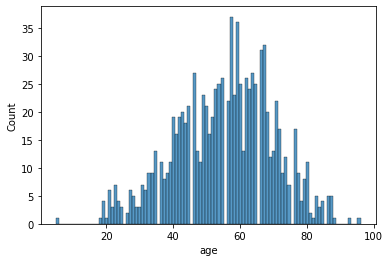

In [22]:
# Not part of the question's requirements
# Making a visualisation to confirm the above
sns.histplot(data=df["age"],bins=100)

In [23]:
# Binning the age column to make it similar to the other columns 
df.loc[df['age'] < 20, 'age'] = 1
df.loc[(df['age'] >= 20) & (df['age'] < 40), 'age'] = 2
df.loc[(df['age'] >= 40) & (df['age'] < 60), 'age'] = 3
df.loc[(df['age'] >= 60) & (df['age'] < 80), 'age'] = 4
df.loc[df['age'] >= 80, 'age'] = 5

# Alternative answer: 
# def age_mapping(age):
#     if age < 20:
#         return 1
#     elif 20 <= age < 40: 
#         return 2
#     elif 40 <= age < 60:
#         return 3
#     elif 60 <= age < 80:
#         return 4 
#     else:
#         return 5 

# df["age"] = df["age"].apply(age_mapping)

In [24]:
# Not part of the question's requirements
# Confirming that the code above works and that the values add up to 960 in total
df["age"].value_counts()

3    436
4    353
2    126
5     39
1      6
Name: age, dtype: int64

### Q3a

Extract a sample of 500 rows of data from df and store them into df itself. You are required to set random seed and random state to 2.

In [25]:
np.random.seed(2)
df = df.sample(500, random_state=2)

In [23]:
# Not part of the question's requirements
# Confirming that the row with incorrect values from dependents, income and health columns weren't included in the sampled rows
df["income"].value_counts()

1    193
4    146
5     74
3     73
2     14
Name: income, dtype: int64

In [26]:
# Not part of the question's requirements 
# However, as you can see, the incorrect risk_type values were taken as part of the 500 samples unfortunately
df[(df["risk_type"] == 6.0) | (df["risk_type"] == 0.0)]

,risk_type,age,dependents,income,health,churn
822,6.0,4,4,4,3,0
887,6.0,3,1,1,1,1
782,6.0,3,2,1,2,1
715,6.0,4,1,1,3,0
705,6.0,2,2,1,3,1
797,0.0,5,4,4,2,0
830,6.0,4,2,1,3,0
743,6.0,3,2,1,3,1


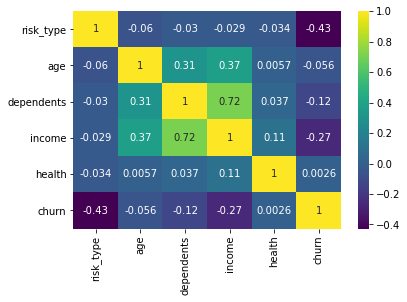

In [27]:
# Not part of the question's requirements
# Brief look at the correlation of the mostly cleaned and edited data
sns.heatmap(df.corr(),cmap="viridis",annot=True);

### Q3b

Create the following numpy arrays named X and y respectively:
- X: stores the values of all the input variables in df
- y: stores the values of all the output variables in df

In [28]:
X = df.drop("churn",axis=1).values
y = df["churn"].values

### Q3c

Using the X and y numpy arrays, split the sample dataset into 75% training data and 25% testing data.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=2)

### Q4a

Build a logistic regression model, logreg, and train the model using the training dataset with the following model specifications:
- Random State = 36
- C = 1e8
- Solver = ‘lbfgs’
- Maximum Iterations = 10000

In [30]:
logreg = LogisticRegression(C=1e8, max_iter=10000, random_state=36, solver='lbfgs')

In [31]:
logreg.fit(X_train,y_train)

LogisticRegression(C=100000000.0, max_iter=10000, random_state=36)

In [10]:
# Answer provided by instructor (Please note that the question's parameters have changed 
# and will be different from this output):

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=36, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Q4b

Using the logreg model, predict the target values using testing data. 

In [32]:
y_pred = logreg.predict(X_test)

### Q4c

Calculate and print the testing accuracy of the logreg model.

In [33]:
from sklearn import metrics

In [34]:
metrics.accuracy_score(y_test,y_pred)

# If it's required to display in two decimal places: round(metrics.accuracy_score(y_test,y_pred),2)

# Alternatively, we can calculate the accuracy score manually once we have the confusion matrix results: 
# test_accuracy = 56+38/(56+38+10+21)
# print(test_accuracy)

0.752

In [12]:
# Answer provided by the instructor 

0.76


In [35]:
# The following cells are not part of the assignment's scope,  
# but we'll include them to get a better understanding of how well our model has done.
# In addition to just test accuracy, we can include further metrics to evaluate the model with:

In [36]:
# Displaying the confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[56, 10],
       [21, 38]])

In [37]:
# Displaying the confusion matrix in dataframe form, with tabulated totals across rows and columns for ease of understanding 
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,56,10,66
1,21,38,59
All,77,48,125


In [38]:
# Create a prediction on the test data for AUC tabulation
y_pred_proba = logreg.predict_proba(X_test)
y_pred_proba = y_pred_proba[:,1]

# Printing accuracy score as well just to make consolidate all performance metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Displaying Recall, Precision, F1 and AUC scores
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-score:", metrics.f1_score(y_test, y_pred))

print("AUC", metrics.roc_auc_score(y_test, y_pred_proba))

# Displaying the classification report 
print(metrics.classification_report( y_true = y_test, y_pred = y_pred))

Accuracy: 0.752
Precision: 0.7916666666666666
Recall: 0.6440677966101694
F1-score: 0.7102803738317757
AUC 0.8297380585516178
              precision    recall  f1-score   support

           0       0.73      0.85      0.78        66
           1       0.79      0.64      0.71        59

    accuracy                           0.75       125
   macro avg       0.76      0.75      0.75       125
weighted avg       0.76      0.75      0.75       125



In [39]:
# Finding the FPR, TPR, and threshold
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba)
print(fpr)
print(tpr)
print(threshold)

[0.         0.         0.         0.         0.         0.03030303
 0.03030303 0.04545455 0.04545455 0.06060606 0.09090909 0.09090909
 0.09090909 0.10606061 0.10606061 0.10606061 0.13636364 0.13636364
 0.15151515 0.15151515 0.16666667 0.1969697  0.24242424 0.27272727
 0.27272727 0.3030303  0.33333333 0.33333333 0.37878788 0.40909091
 0.45454545 0.48484848 0.57575758 0.63636364 0.65151515 0.65151515
 0.66666667 0.71212121 0.72727273 0.75757576 0.78787879 0.81818182
 0.87878788 0.93939394 1.        ]
[0.         0.03389831 0.08474576 0.11864407 0.13559322 0.16949153
 0.20338983 0.25423729 0.27118644 0.30508475 0.38983051 0.47457627
 0.50847458 0.50847458 0.54237288 0.57627119 0.57627119 0.62711864
 0.6440678  0.66101695 0.69491525 0.76271186 0.79661017 0.79661017
 0.83050847 0.83050847 0.83050847 0.84745763 0.84745763 0.84745763
 0.84745763 0.93220339 0.93220339 0.93220339 0.93220339 0.94915254
 0.96610169 0.96610169 0.98305085 0.98305085 0.98305085 1.
 1.         1.         1.        ]


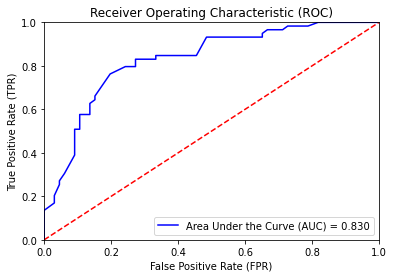

In [40]:
# Plotting the AUC 
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'Area Under the Curve (AUC) = %0.3f' % roc_auc) 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)') 
plt.title('Receiver Operating Characteristic (ROC)') 
plt.legend(loc = 'lower right')
plt.show()

In [41]:
# Predicting the state of a new set of variables and finding the probability of it being in one state or the other 
print(logreg.predict([[2,3,2,4,3]]))
print(logreg.predict_proba([[2,3,2,4,3]]))

[1]
[[0.05734854 0.94265146]]


### Q4d

Report and comment on the testing accuracy of the logreg model.

**Given that the overall accuracy and precision scores are relatively high, I'd say the logreg model is quite accurate despite the somewhat low recall score. To improve metrics, we can further clean up the incorrect values in the risk_type column by either editing them or conducting normalisation, look at using cross validation or tweak some of the parameters such as random state.**

>

<p style="color:blue; font-family:Georgia; text-align:center; font-size:2em;text-align: center;">~~~The End~~~</p>
